EN3160 Assignment 1 on Intensity Transformations and Neighborhood
Filtering


Question-01

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

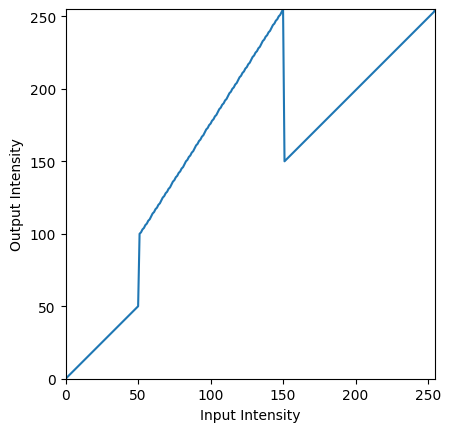

In [3]:
#Creating the Linspace
t1=np.linspace(0,50,51).astype('uint8')
t2=np.linspace(100,255,150-50).astype('uint8')
t3=np.linspace(150,255,255-150).astype('uint8')

#Concatenate linsapces
transform=np.concatenate((t1,t2),axis=0)
transform=np.concatenate((transform,t3),axis=0)

#Plot the trnasformation
fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

#Load the Image from the computer
image_original=cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\emma.jpg",cv.IMREAD_GRAYSCALE)
#Appling Transformation to the Original Image
image_trans=cv.LUT(image_original,transform)
#Dispaly the Original and Transformed Images
cv.imshow("Image",image_original)
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.waitKey(0)
cv.imshow("Image",image_trans)
cv.waitKey(0)
cv.destroyAllWindows()

Question 02


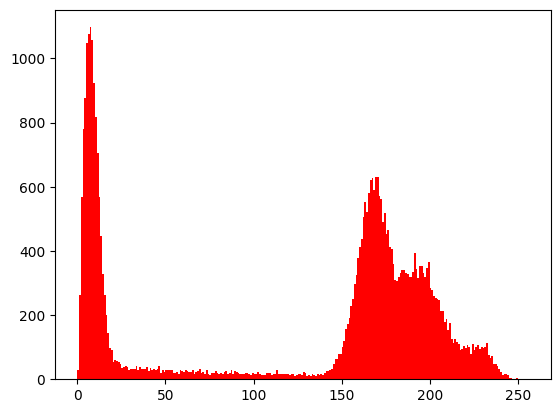

In [4]:
image=cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
plt.hist(image.flatten(),256,[0,256],color='red')
plt.show()

part(a)

White Matter

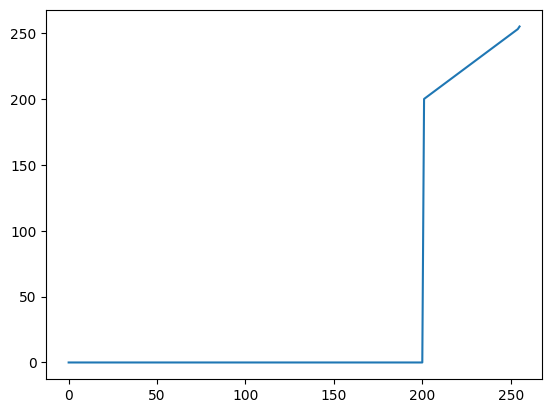

In [5]:
#Creating the Transformation and plot the Transformation
t1=np.linspace(0,0,201).astype('uint8')
t2=np.linspace(200,255,55).astype('uint8')
transform=np.concatenate((t1,t2),axis=0)
plt.plot(transform)
plt.show()

#Applying the Transformation
image_trans=cv.LUT(image,transform)

#Dispaly the Original and Transformed Images
cv.imshow("Image",image)
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.waitKey(0)
cv.imshow("image",image_trans)
cv.waitKey(0)
cv.destroyAllWindows()

Part (b)

Gray Matter

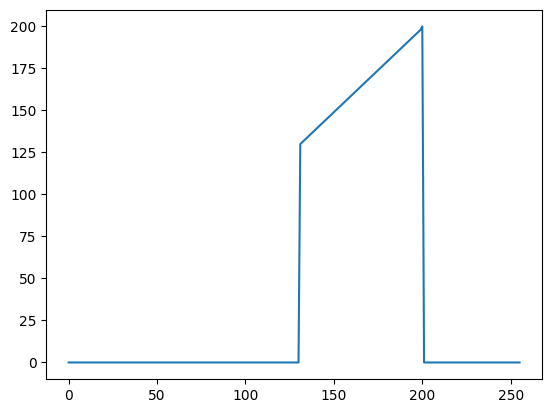

In [6]:
t1=np.linspace(0,0,131).astype('uint8')
t2=np.linspace(130,200,70).astype('uint8')
t3=np.linspace(0,0,55).astype('uint8')
transform=np.concatenate((t1,t2),axis=0)
transform=np.concatenate((transform,t3),axis=0)
plt.plot(transform)
plt.show()

image_trans=cv.LUT(image,transform)
cv.imshow("Image",image)
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.waitKey(0)
cv.imshow("Image",image_trans)
cv.waitKey(0)
cv.destroyAllWindows()

Question 03

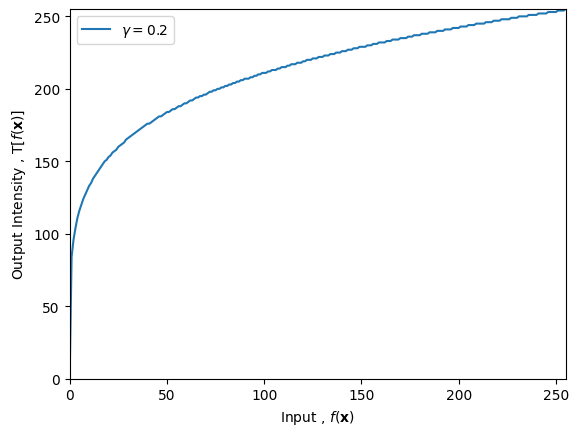

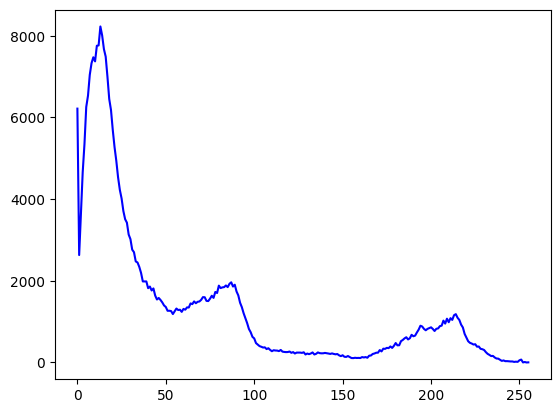

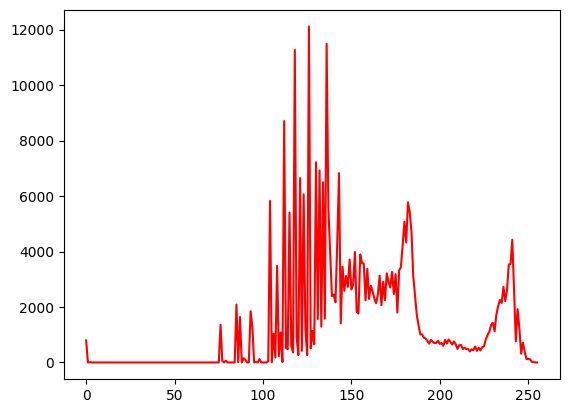

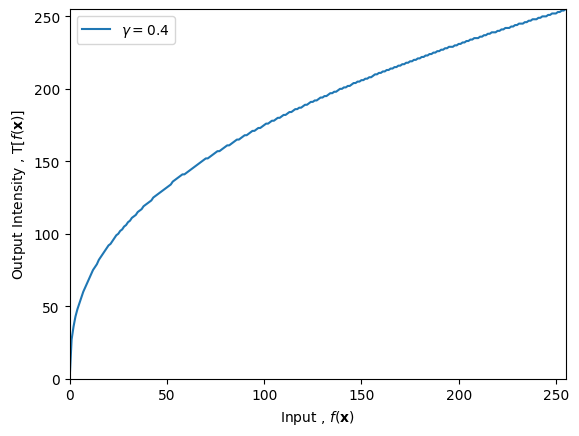

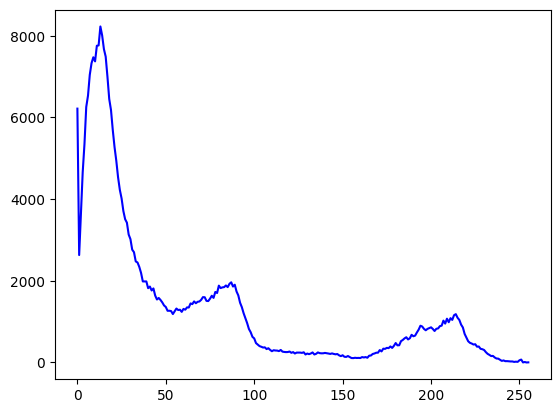

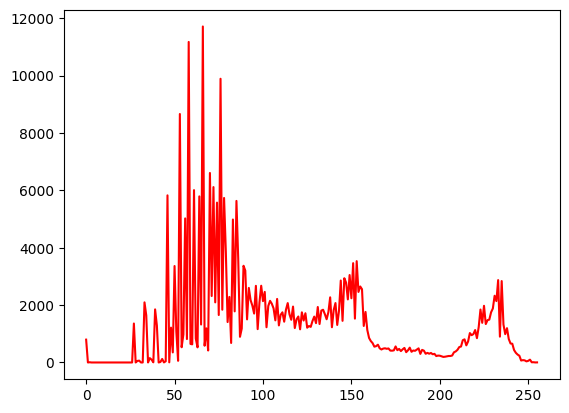

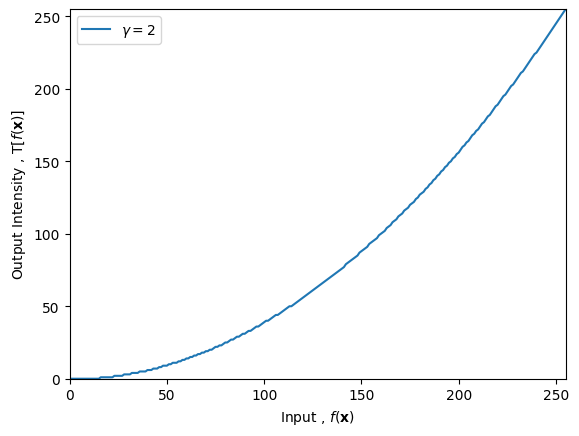

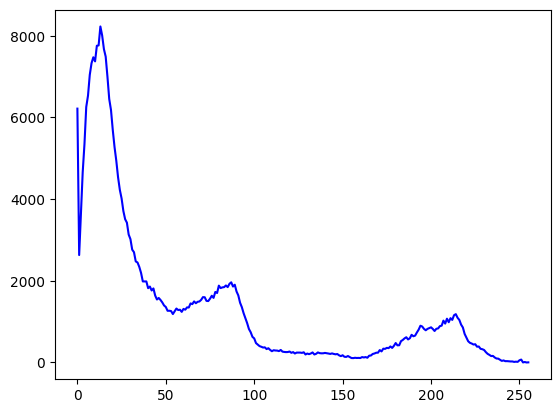

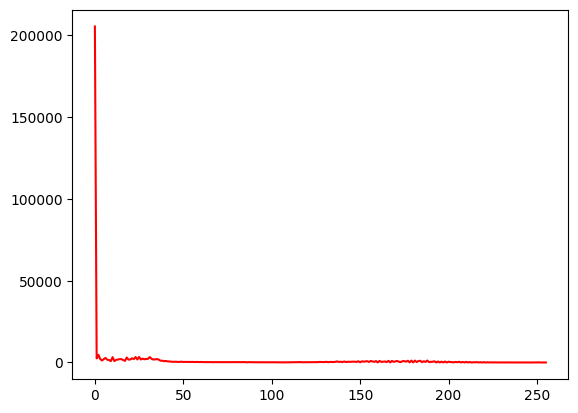

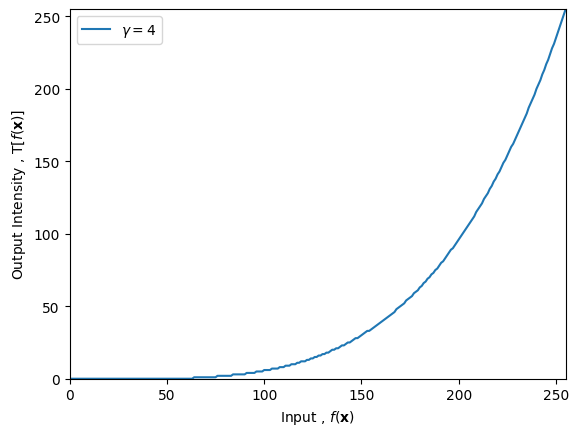

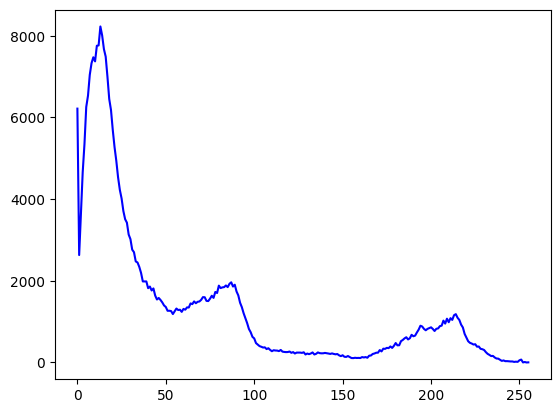

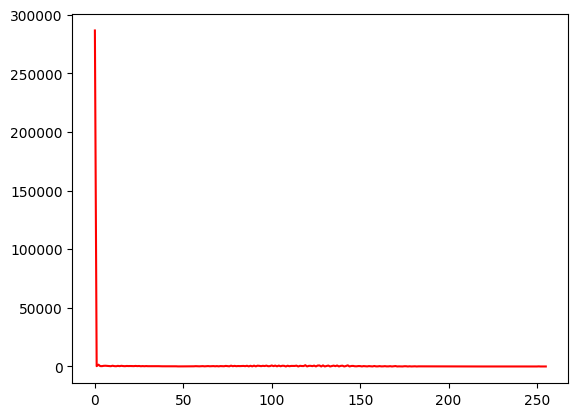

In [7]:
#Load the image from the computer
image_original = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
#Convert to LAB plane
image_convert=cv.cvtColor(image_original,cv.COLOR_BGR2LAB)
L,a,b=cv.split(image_convert)
fig,ax=plt.subplots()
#gamma values
gamma=[0.2,0.4,2,4]

for i in gamma:
    tabel=np.array([(r/255)**i*255 for r in np.arange(0,256)]).astype('uint8')
    image_gamma=cv.LUT(L,tabel) #Applying Gamma correction to L plane

    #plotting the gamma corrrection
    plt.plot(tabel,label=r'$\gamma = {i}$'.format(i=i))
    plt.legend(loc='best')
    plt.xlabel("Input , $f(\mathbf{x})$")
    plt.ylabel("Output Intensity , $\mathrm{T}[f(\mathbf{x})]$")
    plt.xlim(0,255)
    plt.ylim(0,255)
    plt.show()

    #Merge planes(L,a,b) again and Convert to BGR
    corrected_image=cv.merge([image_gamma,a,b])
    corrected_image_BGR=cv.cvtColor(corrected_image,cv.COLOR_LAB2BGR)

    #Plotting histogram of the origianl and the corrected image
    hist_original=cv.calcHist([image_original],[0],None,[256],[0,256])
    hist_corrected=cv.calcHist([corrected_image_BGR],[0],None,[256],[0,256])
    plt.plot(hist_original,color='blue')
    plt.show()
    plt.plot(hist_corrected,color='red')
    plt.show()
    
    cv.imshow("Image",image_original)
    cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
    cv.waitKey(0)
    cv.imshow("image",corrected_image_BGR)
    cv.waitKey(0)
    cv.destroyAllWindows()


    



Question 04

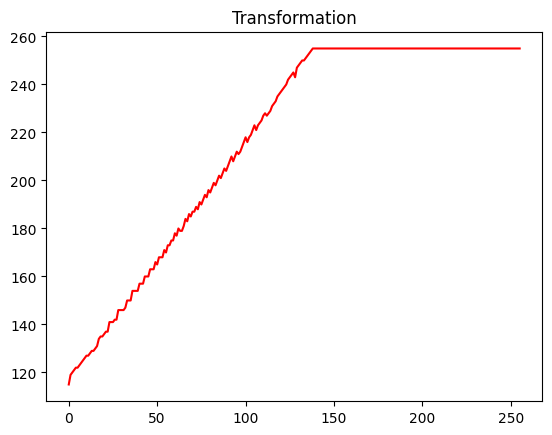

In [81]:
image=cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\spider.png",cv.IMREAD_COLOR)
image_hsv=cv.cvtColor(image,cv.COLOR_BGR2HSV)
hue,saturation,value=cv.split(image_hsv)
def intensity_trnas(a):
    x=np.arange(0,256).astype('uint8')
    sigma=70
    transform=np.minimum((x+a*128*np.exp(-((x-128)**2)/(2*(sigma**2)))),255).astype('uint8')
    return transform

transform=intensity_trnas(0.9)
image_transform=cv.LUT(saturation,transform)
merge_image=cv.merge([hue,image_transform,value])
vibrance_image=cv.cvtColor(merge_image,cv.COLOR_HSV2BGR)

cv.imshow("Image",image)
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.waitKey(0)
cv.imshow("Image",vibrance_image)
cv.waitKey(0)
cv.destroyAllWindows()

plt.plot(transform,color='red')
plt.title("Transformation")
plt.show()





Question 05

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


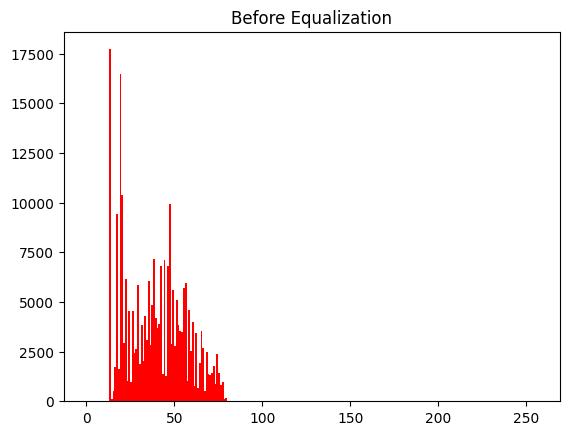

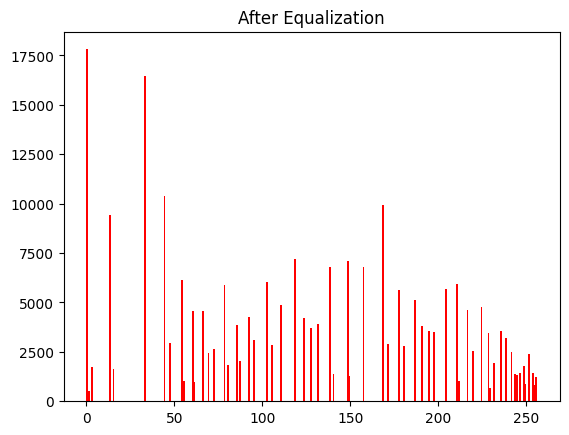

In [14]:
image=cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\shells.tif",cv.IMREAD_GRAYSCALE)
hist,bins=np.histogram(image.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
#plt.plot(cdf_normalized,color='blue')
plt.hist(image.flatten(),256,[0,256],color='red')
plt.title("Before Equalization")
plt.show()
equ_image=cv.equalizeHist(image)
hist,bins=np.histogram(equ_image.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_noramlized=cdf*hist.max()/cdf.max()
#plt.plot(cdf_noramlized,color='blue')
plt.hist(equ_image.flatten(),256,[0,256],color='red')
plt.title("After Equalization")
plt.show()
cv.imshow("Image",image)
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.waitKey(0)
cv.imshow("Image",equ_image)
cv.waitKey(0)
cv.destroyAllWindows()

Question 06

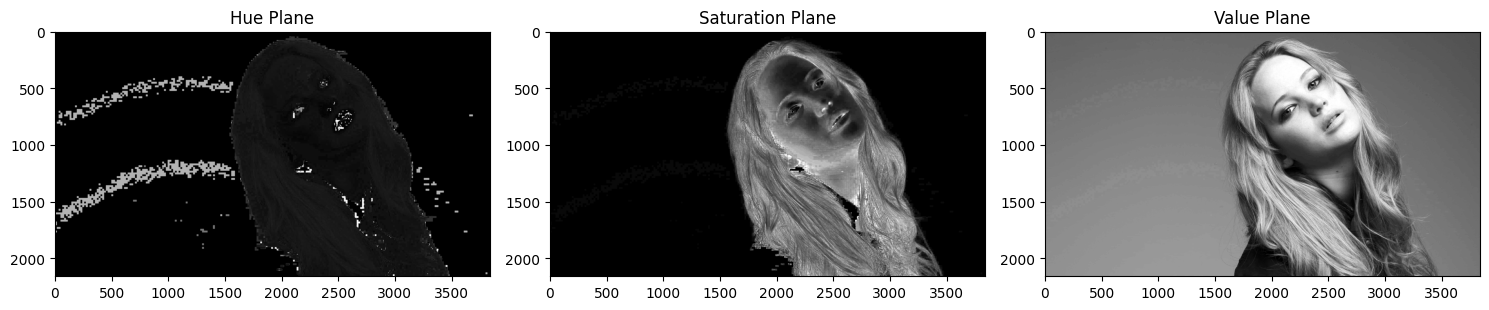

In [90]:
image = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\jeniffer.jpg",cv.IMREAD_COLOR)

# Split the image into hue, saturation, and value planes
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hue_plane, saturation_plane, value_plane = cv.split(hsv_image)

# Display the hue, saturation, and value planes
plt.figure(figsize=(15, 10))

plt.subplot(1,3,1)
plt.imshow(hue_plane,cmap='gray')
plt.title('Hue Plane')

plt.subplot(1,3,2)
plt.imshow(saturation_plane, cmap='gray')
plt.title('Saturation Plane')

plt.subplot(1,3,3)
plt.imshow(value_plane,cmap='gray')
plt.title('Value Plane')

plt.tight_layout()
plt.show()

Question 07

part (a)

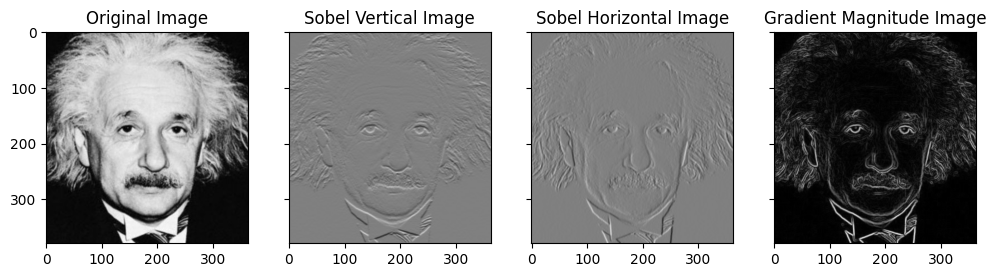

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the grayscale image
im = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

# Define Sobel kernels for vertical and horizontal gradients
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float32')
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')

# Apply Sobel filters to compute vertical and horizontal gradients
imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)

# Compute the gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create subplots to display the images
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12, 12))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')

axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')

axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

plt.show()


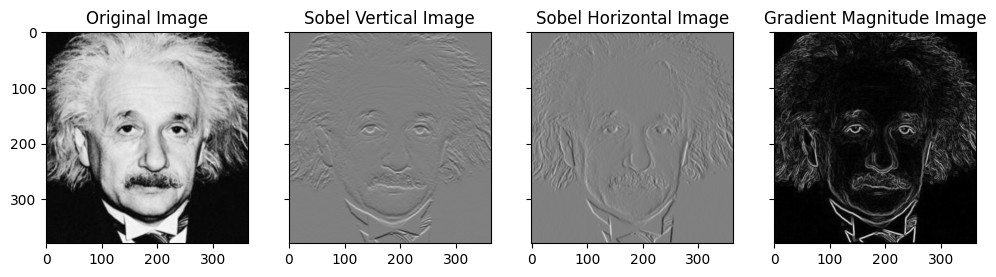

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the grayscale image
im = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing\einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

# Define Sobel kernels for vertical and horizontal gradients
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float32')
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')

# Initialize empty arrays for vertical and horizontal gradient images
imv = np.zeros_like(im)
imh = np.zeros_like(im)

# Perform convolution to compute vertical gradient (imv)
for y in range(1, im.shape[0] - 1):
    for x in range(1, im.shape[1] - 1):
        imv[y, x] = np.sum(im[y-1:y+2, x-1:x+2] * sobel_v)

# Perform convolution to compute horizontal gradient (imh)
for y in range(1, im.shape[0] - 1):
    for x in range(1, im.shape[1] - 1):
        imh[y, x] = np.sum(im[y-1:y+2, x-1:x+2] * sobel_h)

# Compute the gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create subplots to display the images
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12, 12))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')

axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')

axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

plt.show()


Part (c)

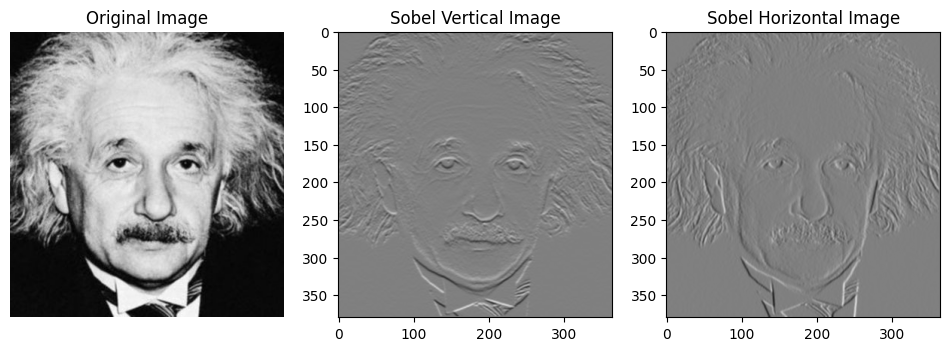

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing/einstein.png")
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY).astype(float)
sobel_h_kernel = np.array([1, 2, 1], dtype=np.float32)
sobel_v_kernel = np.array([1, 0, -1], dtype=np.float32)
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel Vertical Image")

ax[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title("Sobel Horizontal Image")

plt.show()


Qusetion 08

Question 09

Part (a)

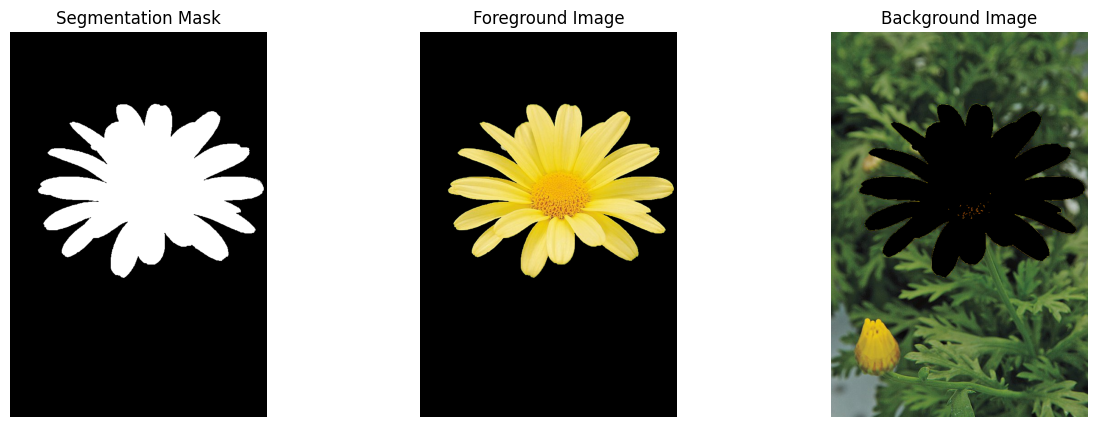

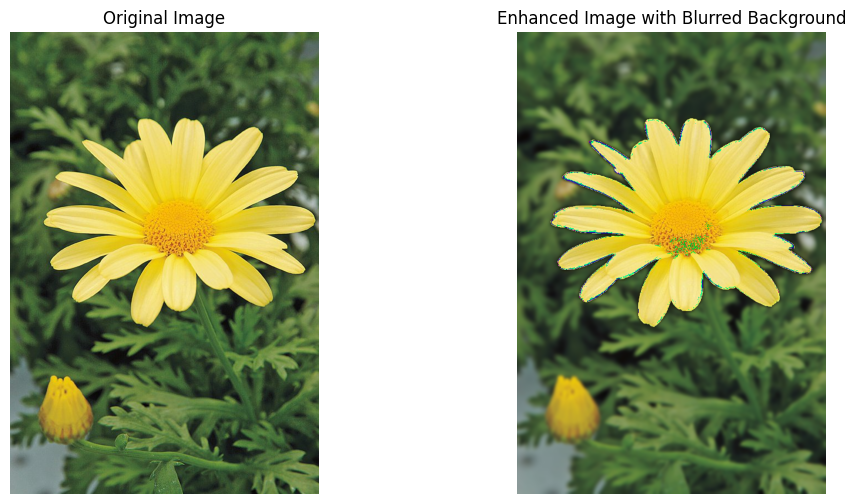

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
img = cv.imread(r"C:\Users\Ramudi\Documents\Semester 05\Image_Processing/daisy.jpeg")

# Create a mask and initialize models
mask = np.zeros(img.shape[:2], np.uint8)
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

# Define a rectangle around the object
rectangle = (50, 50, 505, 505)

# Apply grabCut with rectangle initialization
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

# Create a binary mask for the foreground
mask1 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img1 = img * mask1[:, :, np.newaxis]

# Create a binary mask for the background
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
img2 = img * mask2[:, :, np.newaxis]

# Create a subplot to display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis("off")

plt.show()

# Part (b): Produce an enhanced image with blurred background
blurred_img = img1 + cv.GaussianBlur(img2, (15, 15), 0)

# Display the original image and the enhanced image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image with Blurred Background")
ax[1].axis("off")

plt.show()
